<a href="https://colab.research.google.com/github/SanaSyed15/ML-LAB/blob/main/MACHINE_LEARNING_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning lab:💻🤖**



---



**LAB 1:**Develop a program to create histograms for all numerical features and analyze the distribution of each feature. Generate box plots for all numerical features and identify any outliers. Use California Housing dataset.

---



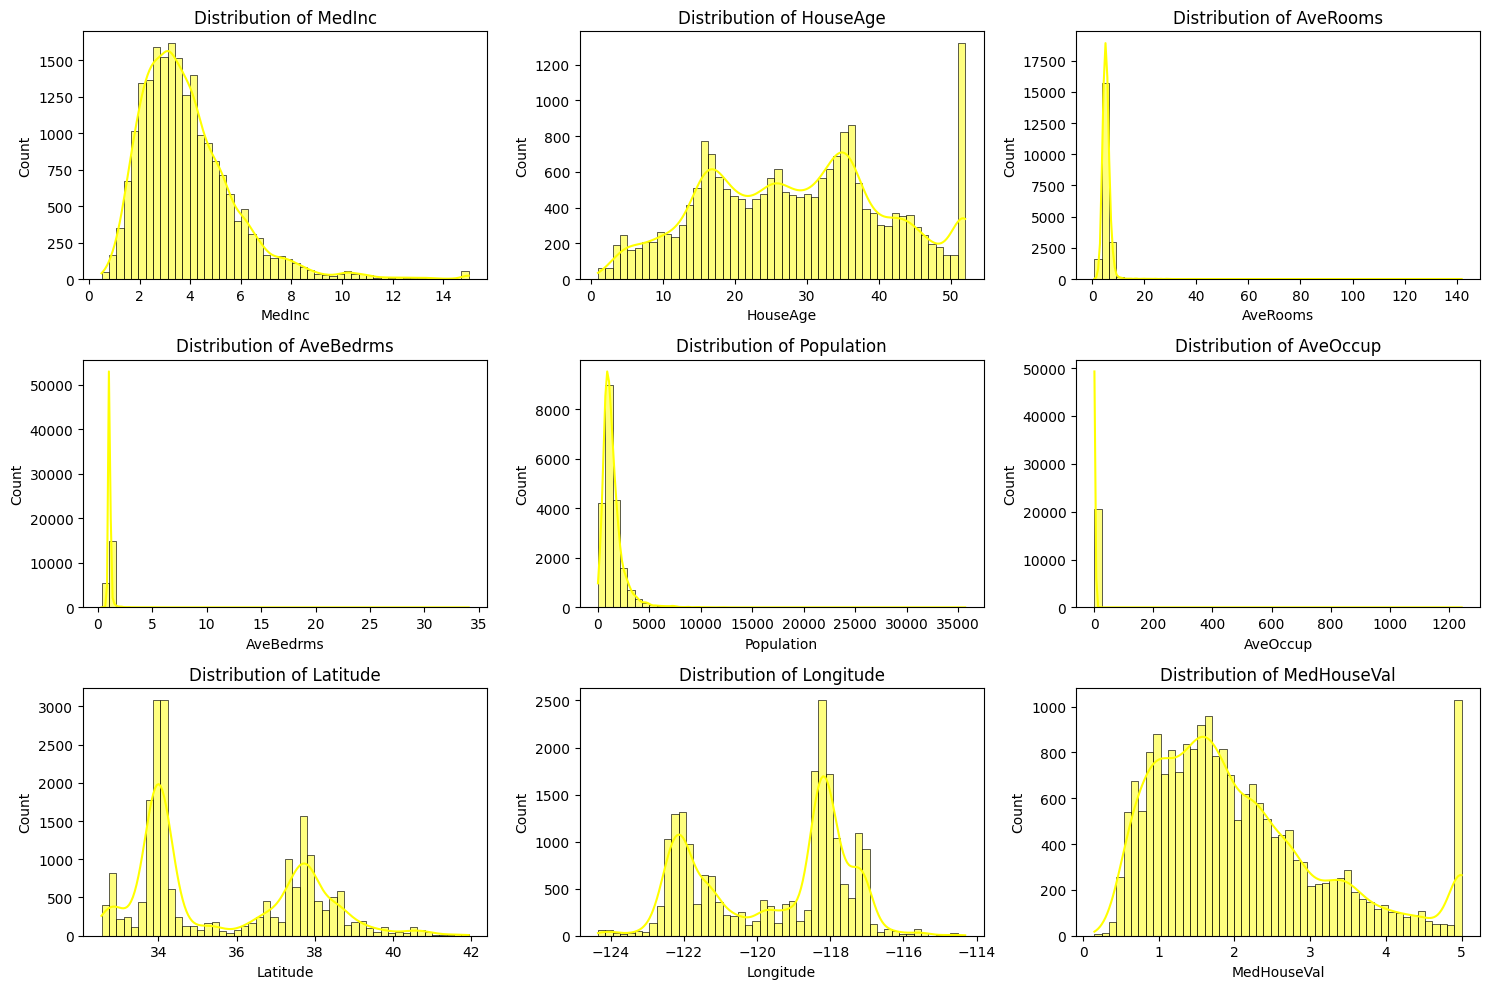

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
data=fetch_california_housing(as_frame=True)
housing_df=data.frame
numerical_features=housing_df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(15,10))
for i,feature in enumerate(numerical_features):
  plt.subplot(3,3,i+1)
  sns.histplot(housing_df[feature],kde=True,bins=50,color='yellow')
  plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

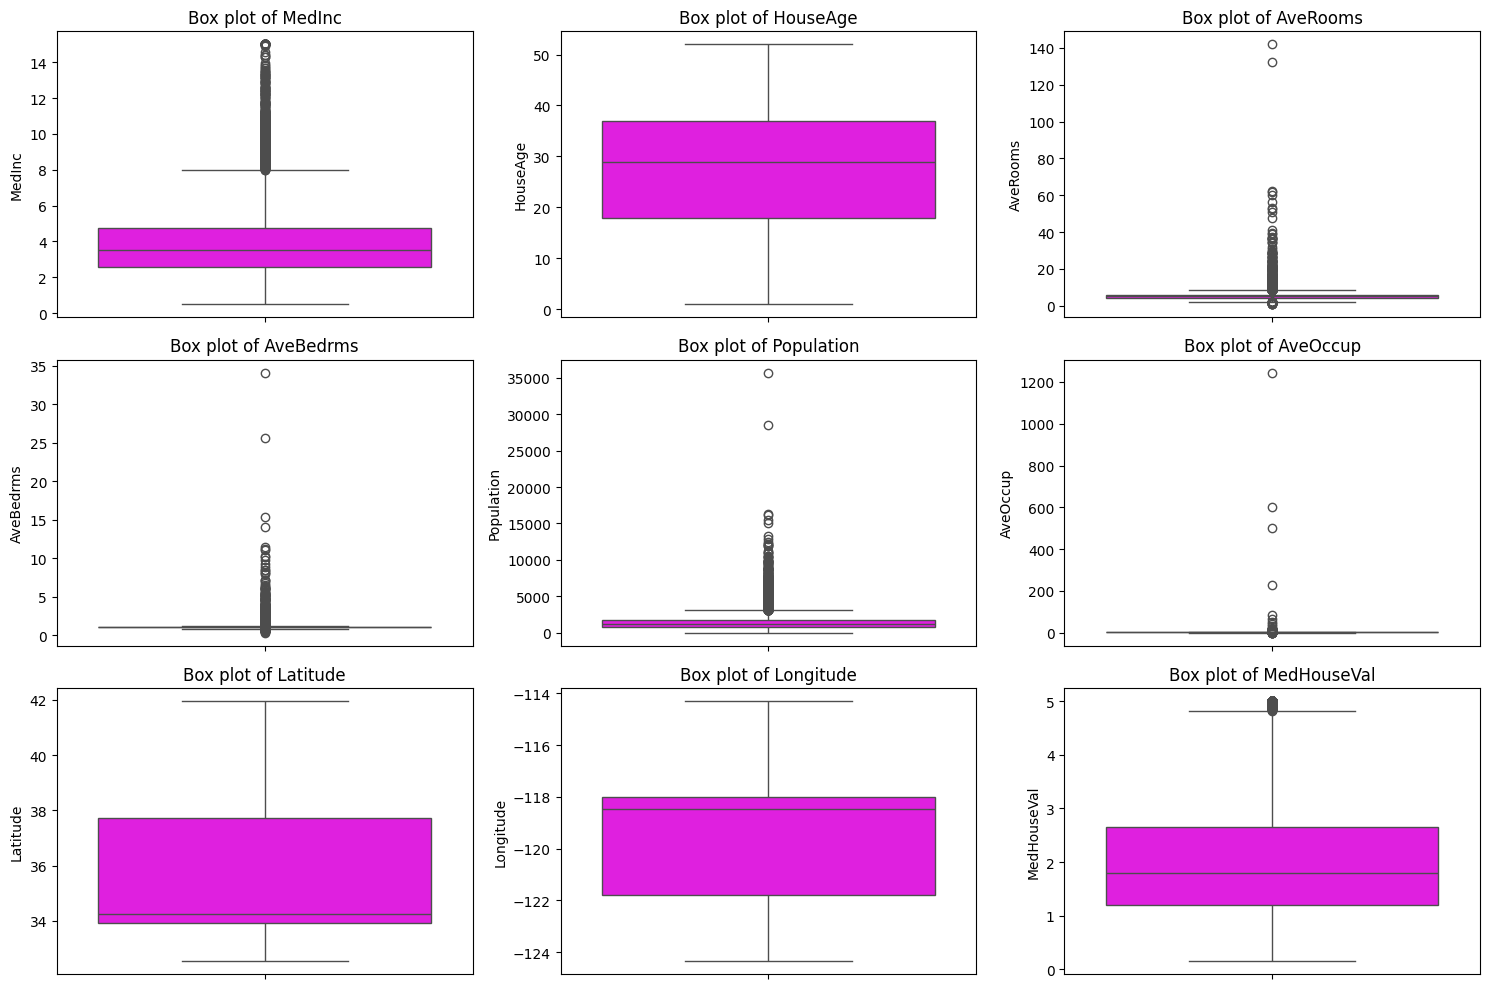

In [ ]:
plt.figure(figsize=(15,10))
for i,feature in enumerate(numerical_features):
  plt.subplot(3,3,i+1)
  sns.boxplot(housing_df[feature],color='magenta')
  plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
print('Outliers detection:')
outliers_summary={}
for feature in numerical_features:
  q1=housing_df[feature].quantile(0.25)
  q3=housing_df[feature].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  outliers=housing_df[(housing_df[feature]<lower_bound)|(housing_df[feature]>upper_bound)]
  outliers_summary[feature]=len(outliers)
  print(f'{feature}:{len(outliers)} outliers ')
print('\n dataset summary')
print(housing_df.describe())

Outliers detection:
MedInc:681 outliers 
HouseAge:0 outliers 
AveRooms:511 outliers 
AveBedrms:1424 outliers 
Population:1196 outliers 
AveOccup:711 outliers 
Latitude:0 outliers 
Longitude:0 outliers 
MedHouseVal:1071 outliers 

 dataset summary
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Lon



---



**LAB 2:**Develop a program to Compute the correlation matrix to understand the relationships between pairs of features. Visualize the correlation matrix using a heatmap to know which variables have strong positive negative correlations. Create a pair plot to visualize pairwise relationships between features. Use California Housing dataset.

---



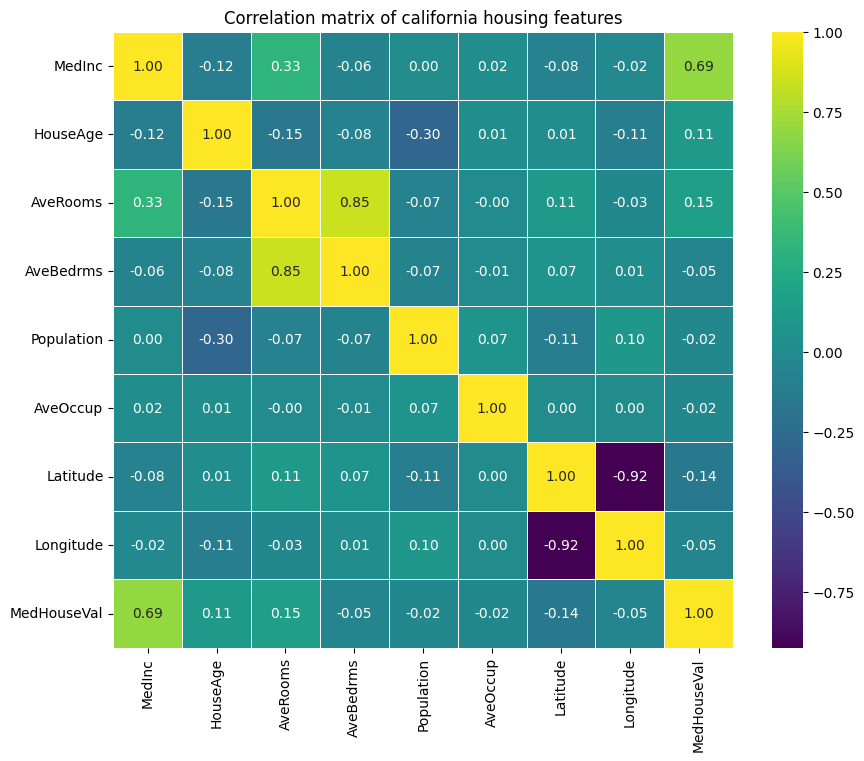

In [ ]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
data=fetch_california_housing(as_frame=True)
housing_df=data.frame
correlation_matrix=housing_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='viridis',fmt='.2f',linewidth=0.5)
plt.title('Correlation matrix of california housing features')
plt.show()

<Figure size 1000x800 with 0 Axes>

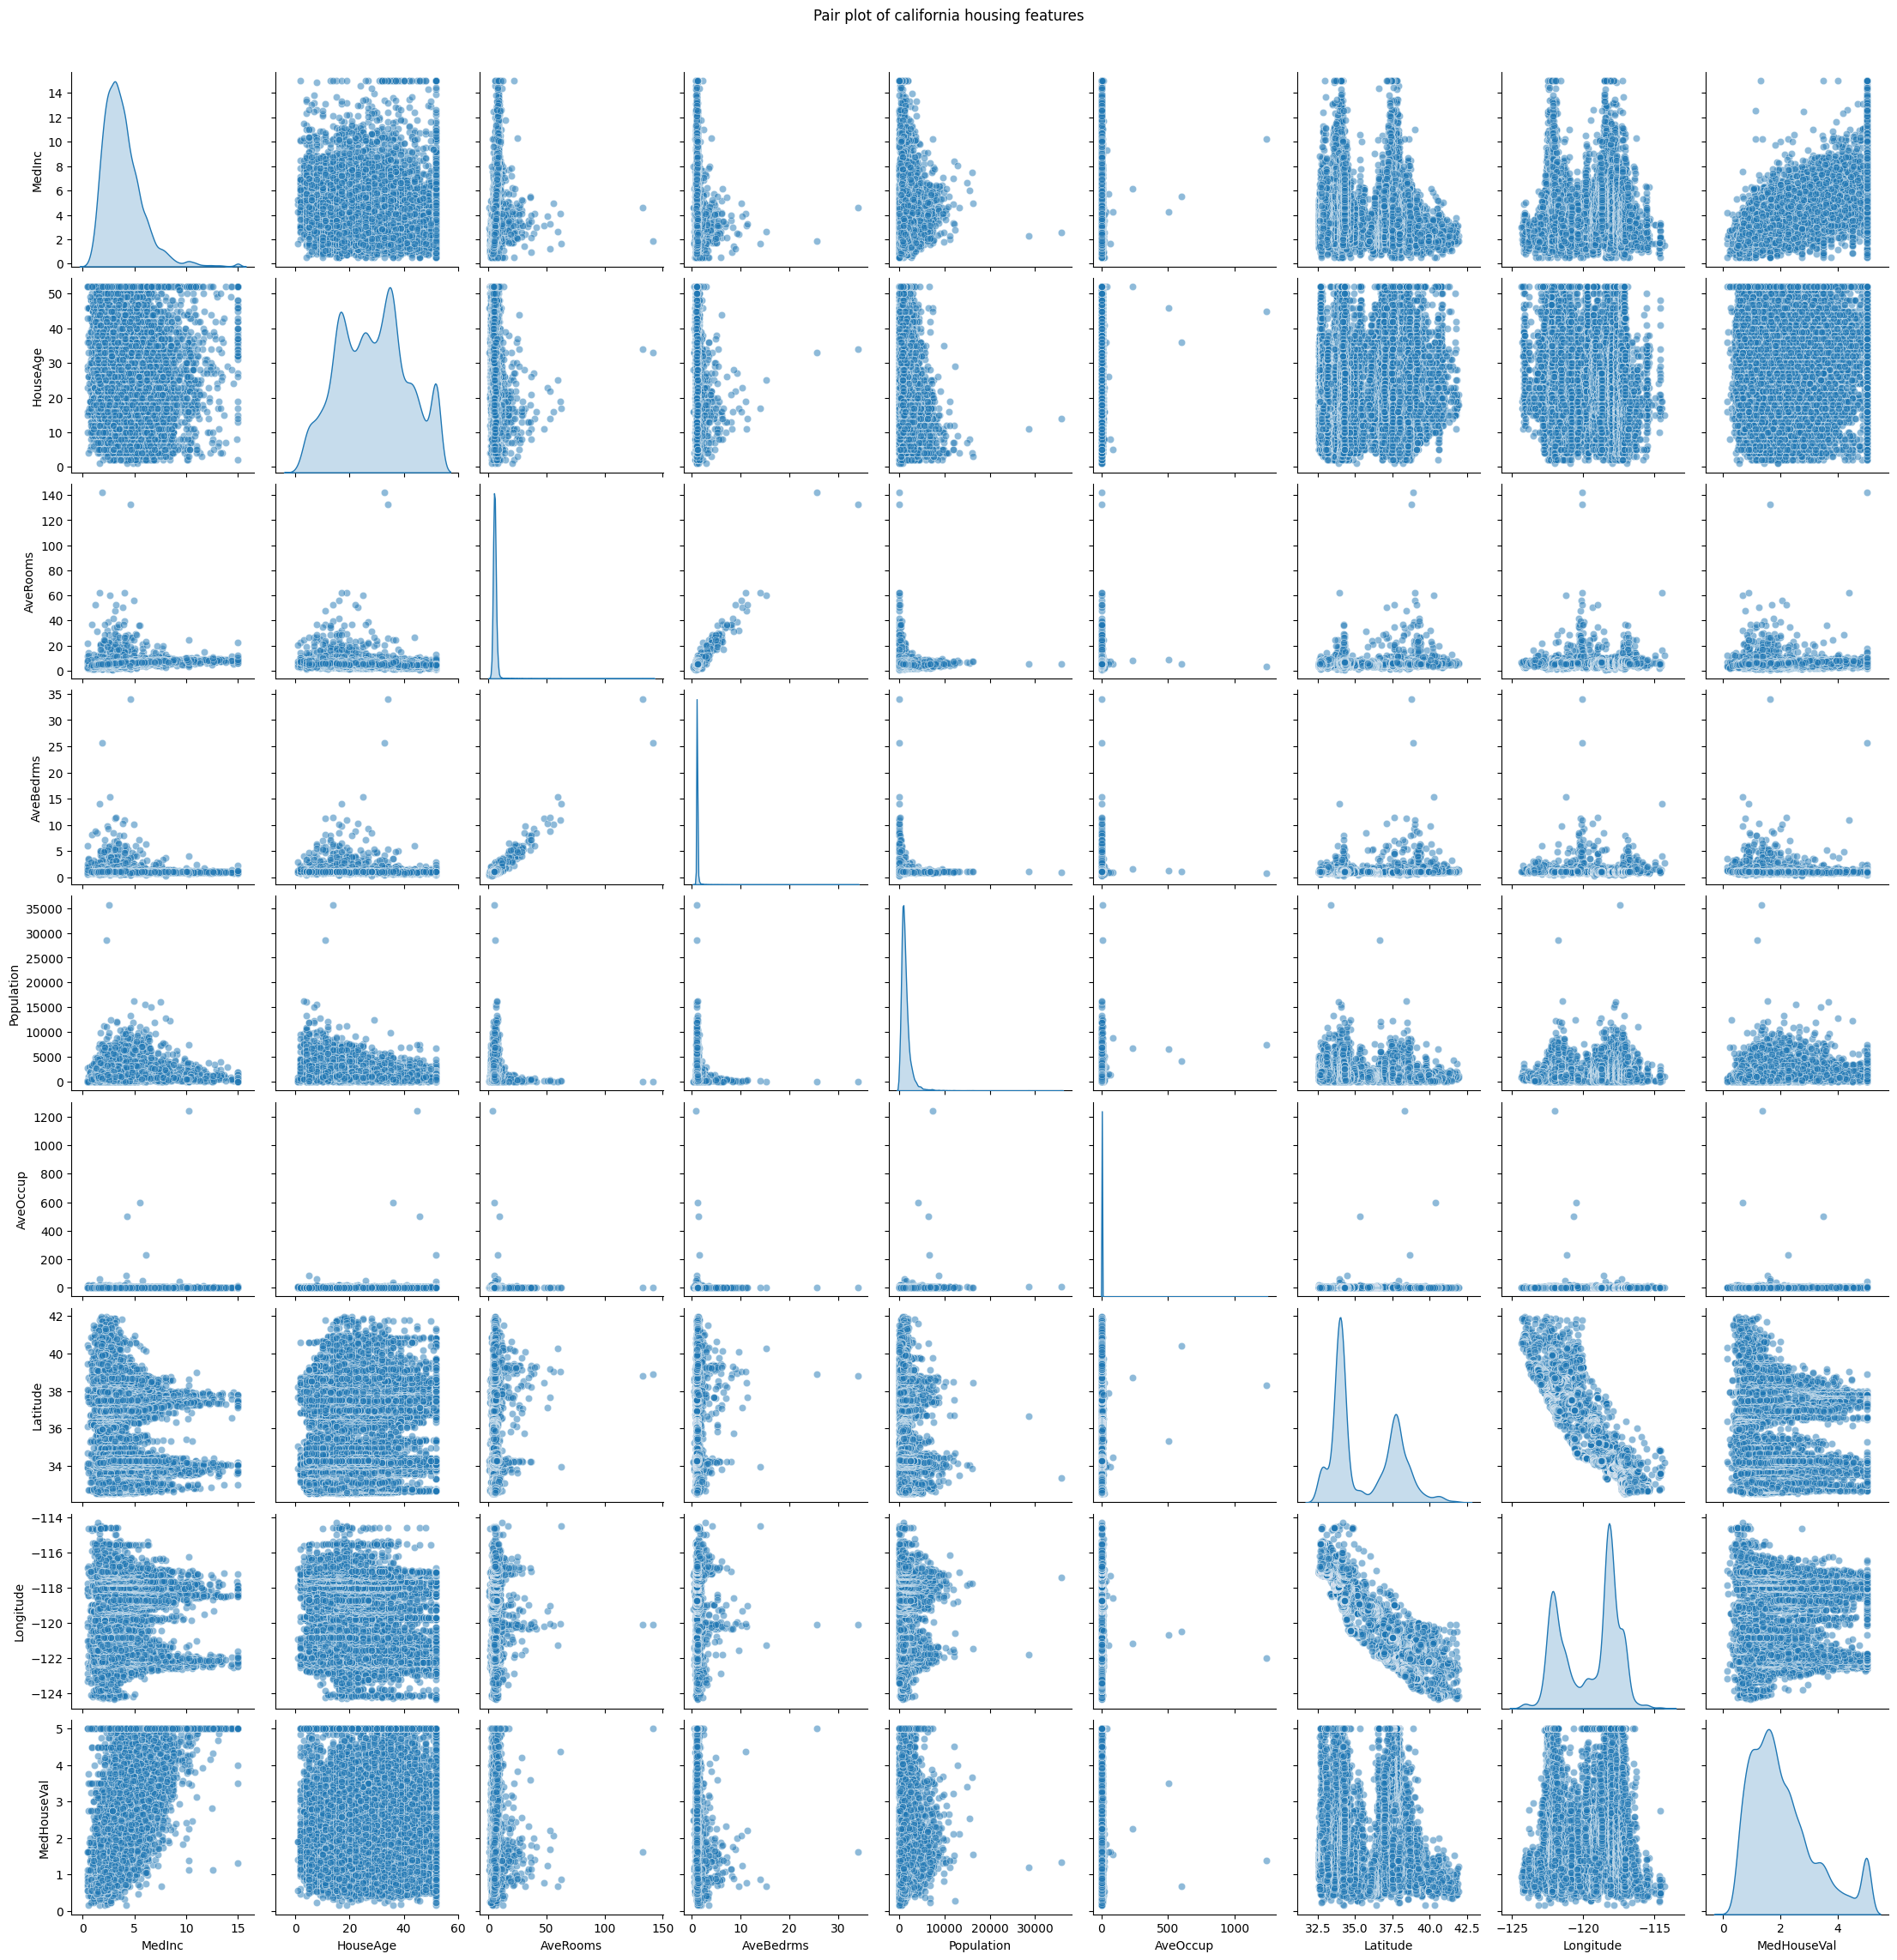

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(housing_df,diag_kind='kde',plot_kws={'alpha':0.5})
plt.suptitle('Pair plot of california housing features',y=1.02)
plt.show()



---



**LAB 3:**Develop a program to implement Principal Component Analysis (PCA) for reducing the dimensionality of the Iris dataset from 4 features to 2.

---



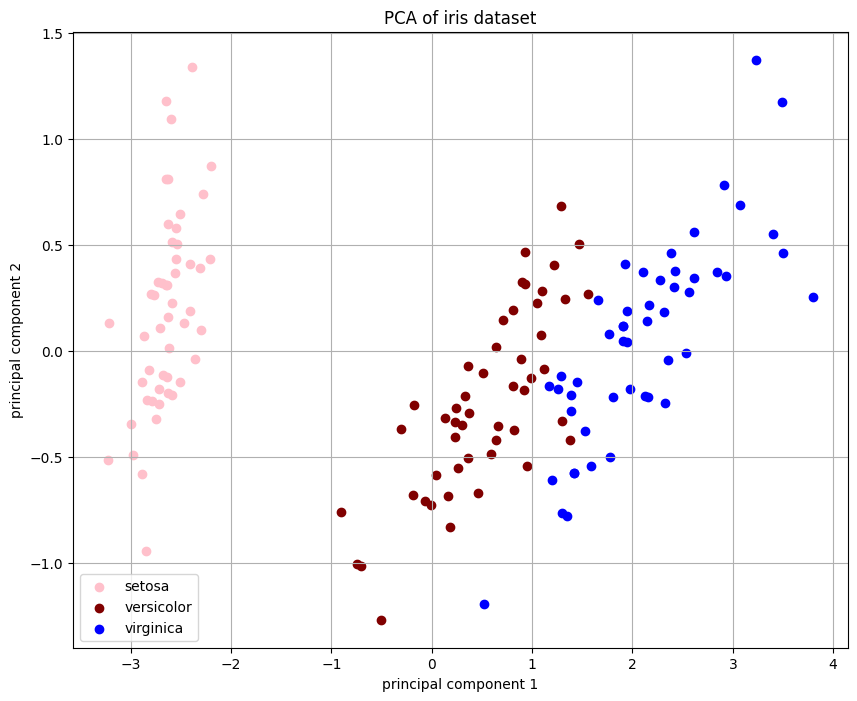

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
iris=load_iris()
data=iris.data
labels=iris.target
label_names=iris.target_names
iris_df=pd.DataFrame(data,columns=iris.feature_names)
pca=PCA(n_components=2)
data_reduced=pca.fit_transform(data)
returned_df=pd.DataFrame(data_reduced,columns=['PC1','PC2'])
returned_df['label']=labels
plt.figure(figsize=(10,8))
colors=['pink','maroon','blue']
for i,label in enumerate(np.unique(labels)):
  plt.scatter(returned_df[returned_df['label']==label]['PC1'],returned_df[returned_df['label']==label]['PC2'],label=label_names[label],color=colors[i])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('PCA of iris dataset')
plt.legend()
plt.grid()
plt.show()




---



**LAB4:**For a given set of training data examples stored in a .CSV file, implement and demonstrate the Find-S algorithm to output a description of the set of all hypotheses consistent with the training examples.

---



In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv('/ws - ws.csv')
attribute=np.array(data)[:,:-1]
target=np.array(data)[:,-1]
print("Training data")
print(data)
def train(att,tar):
  for i,val in enumerate(tar):
    if val.lower()=='yes':
      specific_h=att[i].copy()
      break
  for i,val in enumerate(att):
    if tar[i].lower()=='yes':
      for x in range(len(specific_h)):
        if val[x]!=specific_h[x]:
          specific_h[x]='?'
        else:
          pass
  return specific_h
print(train(attribute,target))


Training data
     SKY AIR_TEM  HUMIDI    WIND WATER FORECAST ENJOY_SPORTS
0  Sunny    Warm  Normal  Strong  Warm     Same          Yes
1  Sunny    Warm    High  Strong  Warm     Same          Yes
2  Rainy    Cold    High  Strong  Warm   Change           No
3  Sunny    Warm    High  Strong  Cool   Change          Yes
['Sunny' 'Warm' '?' 'Strong' '?' '?']




---



**LAB 5:**Develop a program to implement k-Nearest Neighbour algorithm to classify the randomly generated 100 values of x in the range of [0,1]. Perform the following based on dataset generated.
a. Label the first 50 points {x1,......,x50} as follows: if (xi ≤ 0.5), then xi ∊ Class1, else xi ∊ Class1
b. Classify the remaining points, x51,......,x100 using KNN. Perform this for k=1,2,3,4,5,20,30

---



In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
data=np.random.rand(100).reshape(-1,1)
label=np.array(["Class1" if x<=0.5 else "Class2" for x in data[:50]])
train_data,train_label=data[:50],label
test_data=data[50:]
k_values=[1,2,3,4,5,20,30]
for k in k_values:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(train_data,train_label)
  predictions=knn.predict(test_data)
  print(f"Predictions for k={k}: {predictions}")


Predictions for k=1: ['Class1' 'Class1' 'Class1' 'Class2' 'Class2' 'Class2' 'Class2' 'Class1'
 'Class2' 'Class1' 'Class2' 'Class2' 'Class2' 'Class1' 'Class1' 'Class2'
 'Class1' 'Class2' 'Class2' 'Class1' 'Class1' 'Class1' 'Class1' 'Class2'
 'Class1' 'Class2' 'Class2' 'Class2' 'Class1' 'Class2' 'Class2' 'Class2'
 'Class1' 'Class1' 'Class1' 'Class2' 'Class2' 'Class1' 'Class1' 'Class1'
 'Class2' 'Class1' 'Class2' 'Class2' 'Class1' 'Class2' 'Class2' 'Class2'
 'Class2' 'Class2']
Predictions for k=2: ['Class1' 'Class1' 'Class1' 'Class2' 'Class2' 'Class2' 'Class2' 'Class1'
 'Class2' 'Class1' 'Class2' 'Class2' 'Class1' 'Class1' 'Class1' 'Class2'
 'Class1' 'Class2' 'Class2' 'Class1' 'Class1' 'Class1' 'Class1' 'Class2'
 'Class1' 'Class2' 'Class2' 'Class2' 'Class1' 'Class2' 'Class2' 'Class2'
 'Class1' 'Class1' 'Class1' 'Class2' 'Class2' 'Class1' 'Class1' 'Class1'
 'Class2' 'Class1' 'Class2' 'Class2' 'Class1' 'Class2' 'Class2' 'Class1'
 'Class2' 'Class2']
Predictions for k=3: ['Class1' 'Class1' 'C



---



**LAB 6:**Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select appropriate data set for your experiment and draw graphs

---



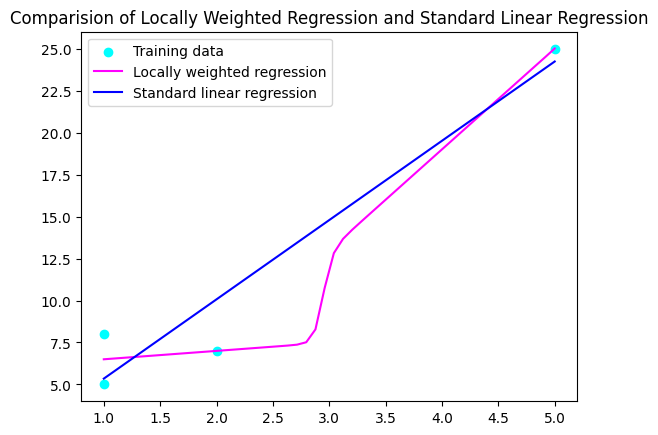

In [6]:
import numpy as np
import matplotlib.pyplot as plt
def locally_weighted_regression(X_train,y_train,X_test,tau):
  weights=np.exp(-(X_test-X_train)**2/(2*tau**2))
  X=np.vstack((np.ones_like(X_train),X_train)).T
  W=np.diag(weights)
  beta=np.linalg.inv(X.T@W@X)@X.T@W@y_train
  return beta[0]+beta[1]*X_test
X_train=np.array([5,1,2,1])
y_train=np.array([25,5,7,8])
X_test_points=np.linspace(min(X_train),max(X_train),50)
tau=0.4
lwr_y_pred=[locally_weighted_regression(X_train,y_train,x,tau)for x in X_test_points]

X_std=np.vstack((np.ones_like(X_train),X_train)).T
beta_std=np.linalg.inv(X_std.T@X_std)@X_std.T@y_train
std_y_pred=beta_std[0]+beta_std[1]*X_test_points

plt.title('Comparision of Locally Weighted Regression and Standard Linear Regression')
plt.scatter(X_train,y_train,label='Training data',color='cyan')
plt.plot(X_test_points,lwr_y_pred,color='magenta',label='Locally weighted regression')
plt.plot(X_test_points,std_y_pred,color='blue',label='Standard linear regression')
plt.legend()
plt.show()







---



**LAB 7:**Develop a program to demonstrate the working of Linear Regression and Polynomial Regression. Use Boston Housing Dataset for Linear Regression and Auto MPG Dataset (for vehicle fuel efficiency prediction) for Polynomial Regression.

---



Demonstrating linear regression and polynomial regression


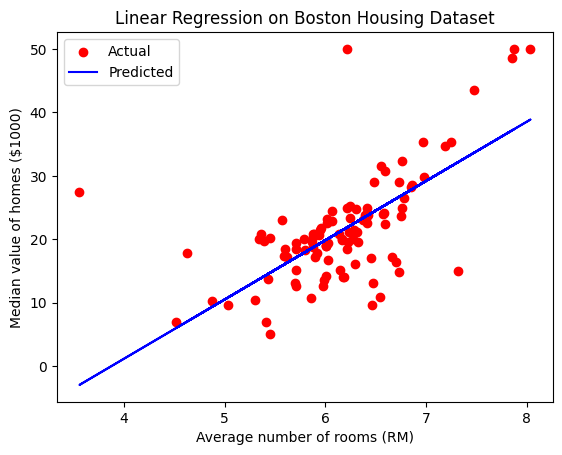

Linear Regression on Boston Housing Dataset
Mean Squared Error: 46.144775347317264
R^2 score: 0.3707569232254778


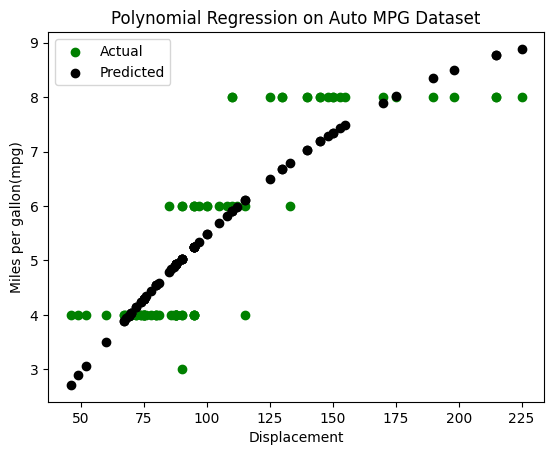

Polynomial Regression on Auto MPG Dataset
Mean Squared Error: 0.7431490557205861
R^2 score: 0.7505650609469626


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.pipeline import make_pipeline
def linear_regression_boston_housing():
  url="https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
  df=pd.read_csv(url)
  X=df[["rm"]].values
  y=df["medv"].values
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
  model=LinearRegression()
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  plt.scatter(X_test,y_test,color='red',label='Actual')
  plt.plot(X_test,y_pred,color='blue',label='Predicted')
  plt.title('Linear Regression on Boston Housing Dataset')
  plt.xlabel('Average number of rooms (RM)')
  plt.ylabel('Median value of homes ($1000)')
  plt.legend()
  plt.show()

  print("Linear Regression on Boston Housing Dataset")
  print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
  print("R^2 score:",r2_score(y_test,y_pred))
def polynomial_regression_auto_mpg():
  url="https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
  column_names=["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year","origin"]
  data=pd.read_csv(url,sep='\s+',names=column_names,na_values="?")
  data=data.dropna()
  X=data["displacement"].values.reshape(-1,1)
  y=data["mpg"].values
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
  poly_model=make_pipeline(PolynomialFeatures(degree=2),StandardScaler(),LinearRegression())
  poly_model.fit(X_train,y_train)
  y_pred=poly_model.predict(X_test)
  plt.scatter(X_test,y_test,color='green',label='Actual')
  plt.scatter(X_test,y_pred,color='black',label='Predicted')
  plt.title('Polynomial Regression on Auto MPG Dataset')
  plt.xlabel('Displacement')
  plt.ylabel('Miles per gallon(mpg)')
  plt.legend()
  plt.show()

  print("Polynomial Regression on Auto MPG Dataset")
  print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
  print("R^2 score:",r2_score(y_test,y_pred))

if __name__=="__main__":
  print("Demonstrating linear regression and polynomial regression")
  linear_regression_boston_housing()
  polynomial_regression_auto_mpg()





---



**LAB 8:**Develop a program to demonstrate the working of the decision tree algorithm. Use Breast Cancer Data set for building the decision tree and apply this knowledge to classify a new sample.


---



Accuracy on the test data:0.93


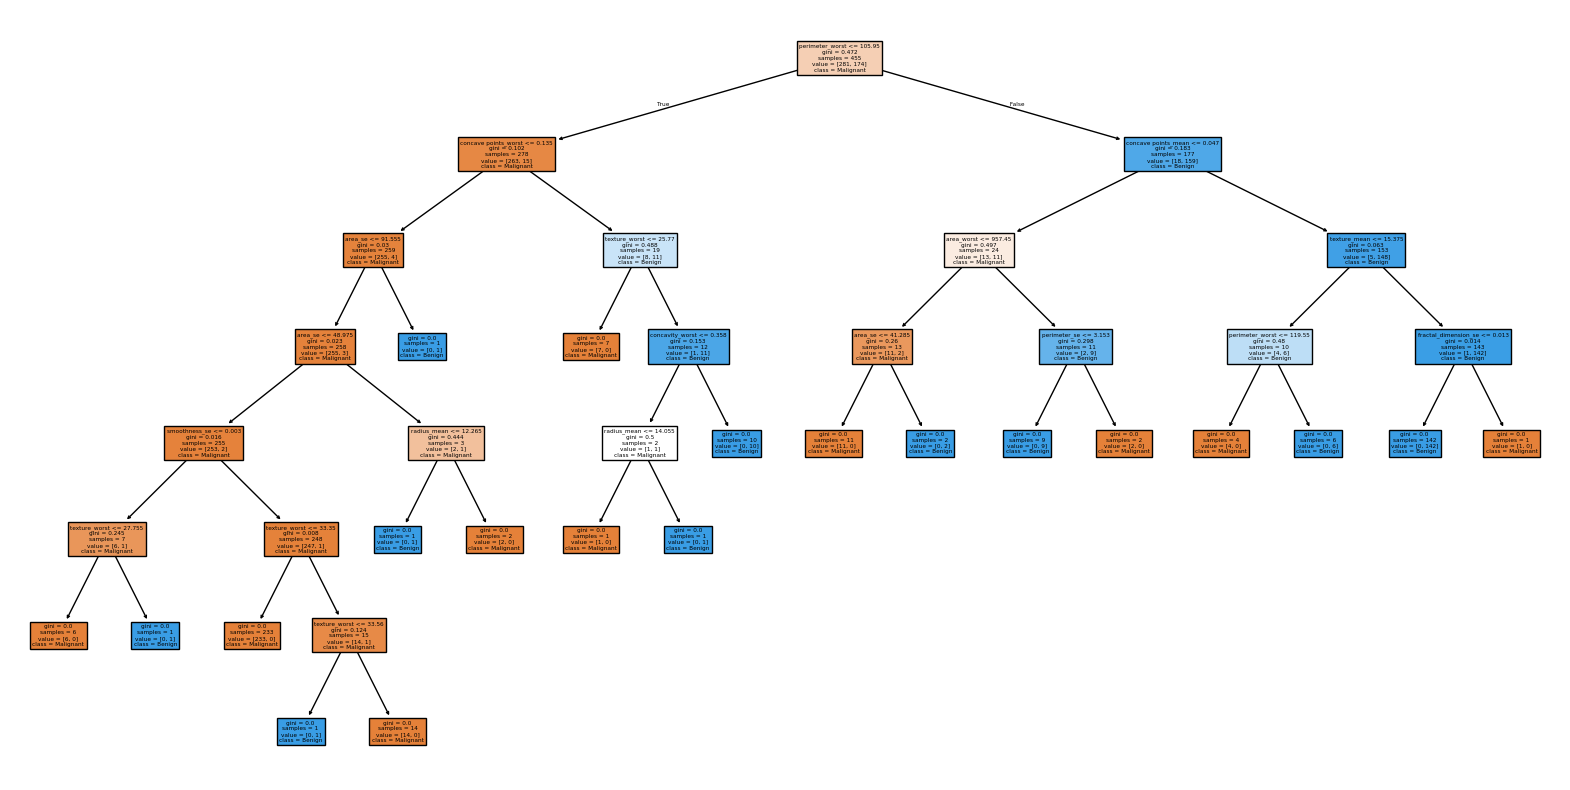

Predicted diagnosis for new sample:M


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
data=pd.read_csv(r'/content/WBCD - WBCD.csv')
data=data.drop(columns=[col for col in data.columns if 'Unnamed' in col or col == 'id'])
X=data.drop('diagnosis',axis=1)
y=data['diagnosis']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2052025)
clf=DecisionTreeClassifier(criterion='gini',random_state=42)
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print(f"Accuracy on the test data:{accuracy:.2f}")
plt.figure(figsize=(20,10))
plot_tree(clf,filled=True,feature_names=X.columns,class_names=['Malignant','Benign'])
plt.show()
new_sample_array=np.array([[17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189]])
new_sample_df=pd.DataFrame(new_sample_array,columns=X.columns)
prediction=clf.predict(new_sample_df)
print(f"Predicted diagnosis for new sample:{prediction[0]}")





---



**LAB 9:**Develop a program to implement the Naive Bayesian classifier considering Olivetti Face Data set for training.Compute the accuracy of the classifier, considering a few test data sets.



---



downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Accuracy: 89.17%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      0.67      0.80         3
           2       0.67      0.67      0.67         3
           3       0.43      1.00      0.60         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.0

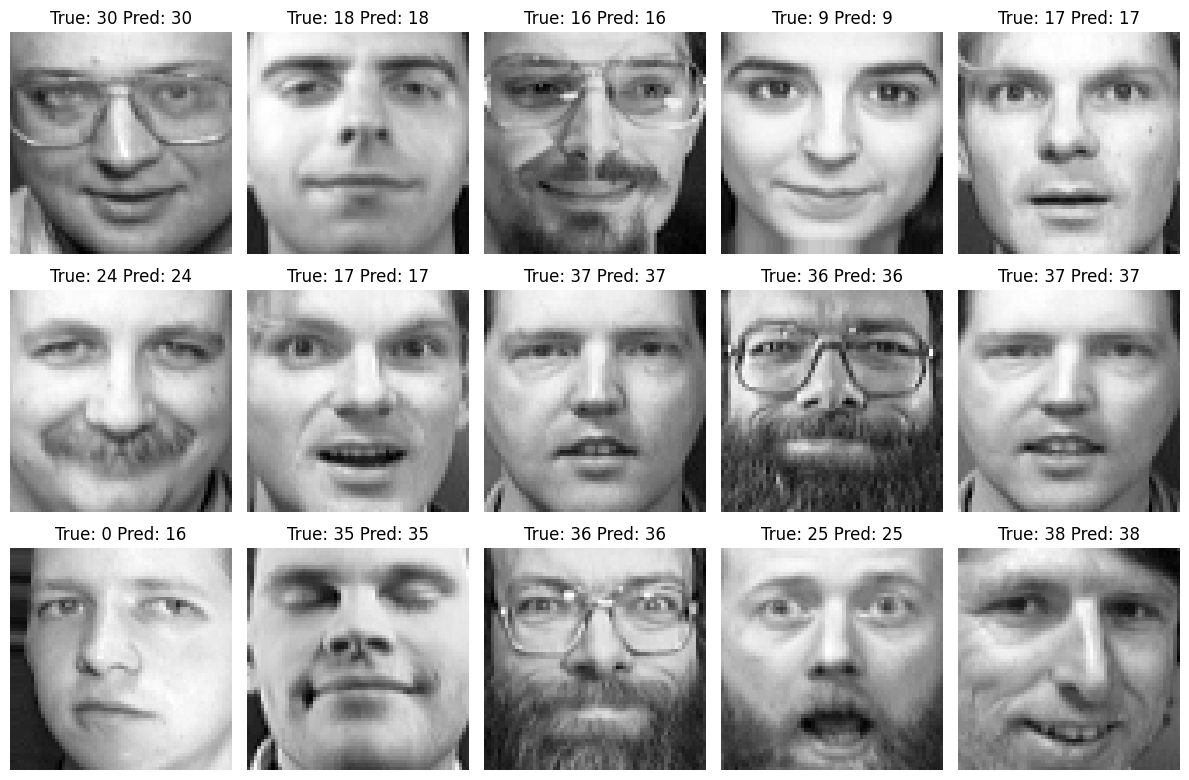

In [13]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
# Load Olivetti Faces dataset
data = fetch_olivetti_faces(shuffle=True, random_state=42)
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
for ax, image, label, prediction in zip(axes.ravel(), X_test, y_test, y_pred):
   ax.imshow(image.reshape(64, 64), cmap=plt.cm.gray)
   ax.set_title(f"True: {label} Pred: {prediction}")
   ax.axis('off')
plt.tight_layout()
plt.show()




---



**LAB 10:**Develop a program to implement k-means clustering using Wisconsin Breast Cancer data set and visualize the clustering result.


---



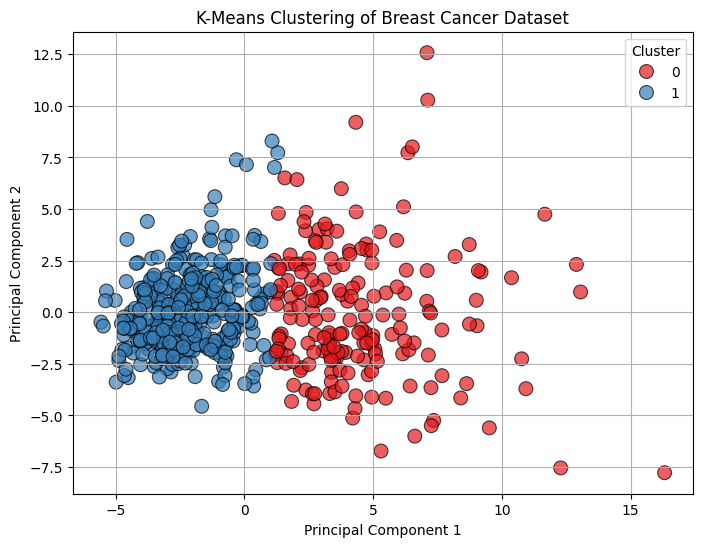

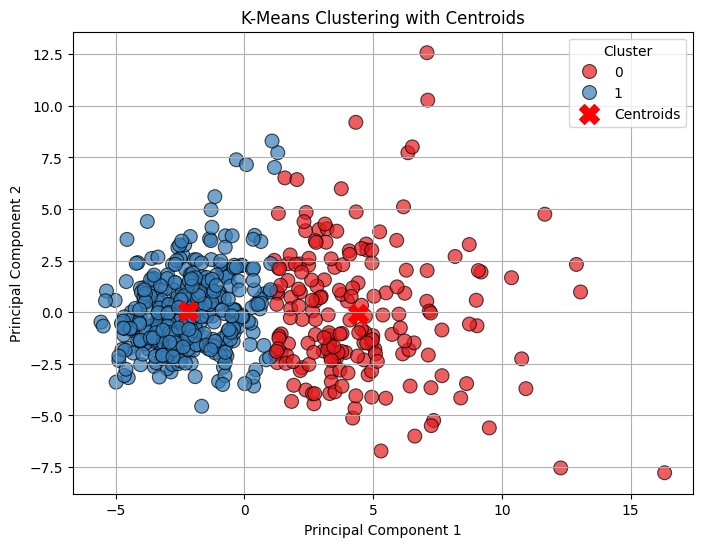

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
data = load_breast_cancer()
X = data.data
y = data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Cluster'] = y_kmeans
df['True Label'] = y
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100, edgecolor='black',  alpha=0.7)
plt.title('K-Means Clustering of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100, edgecolor='black',  alpha=0.7)
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


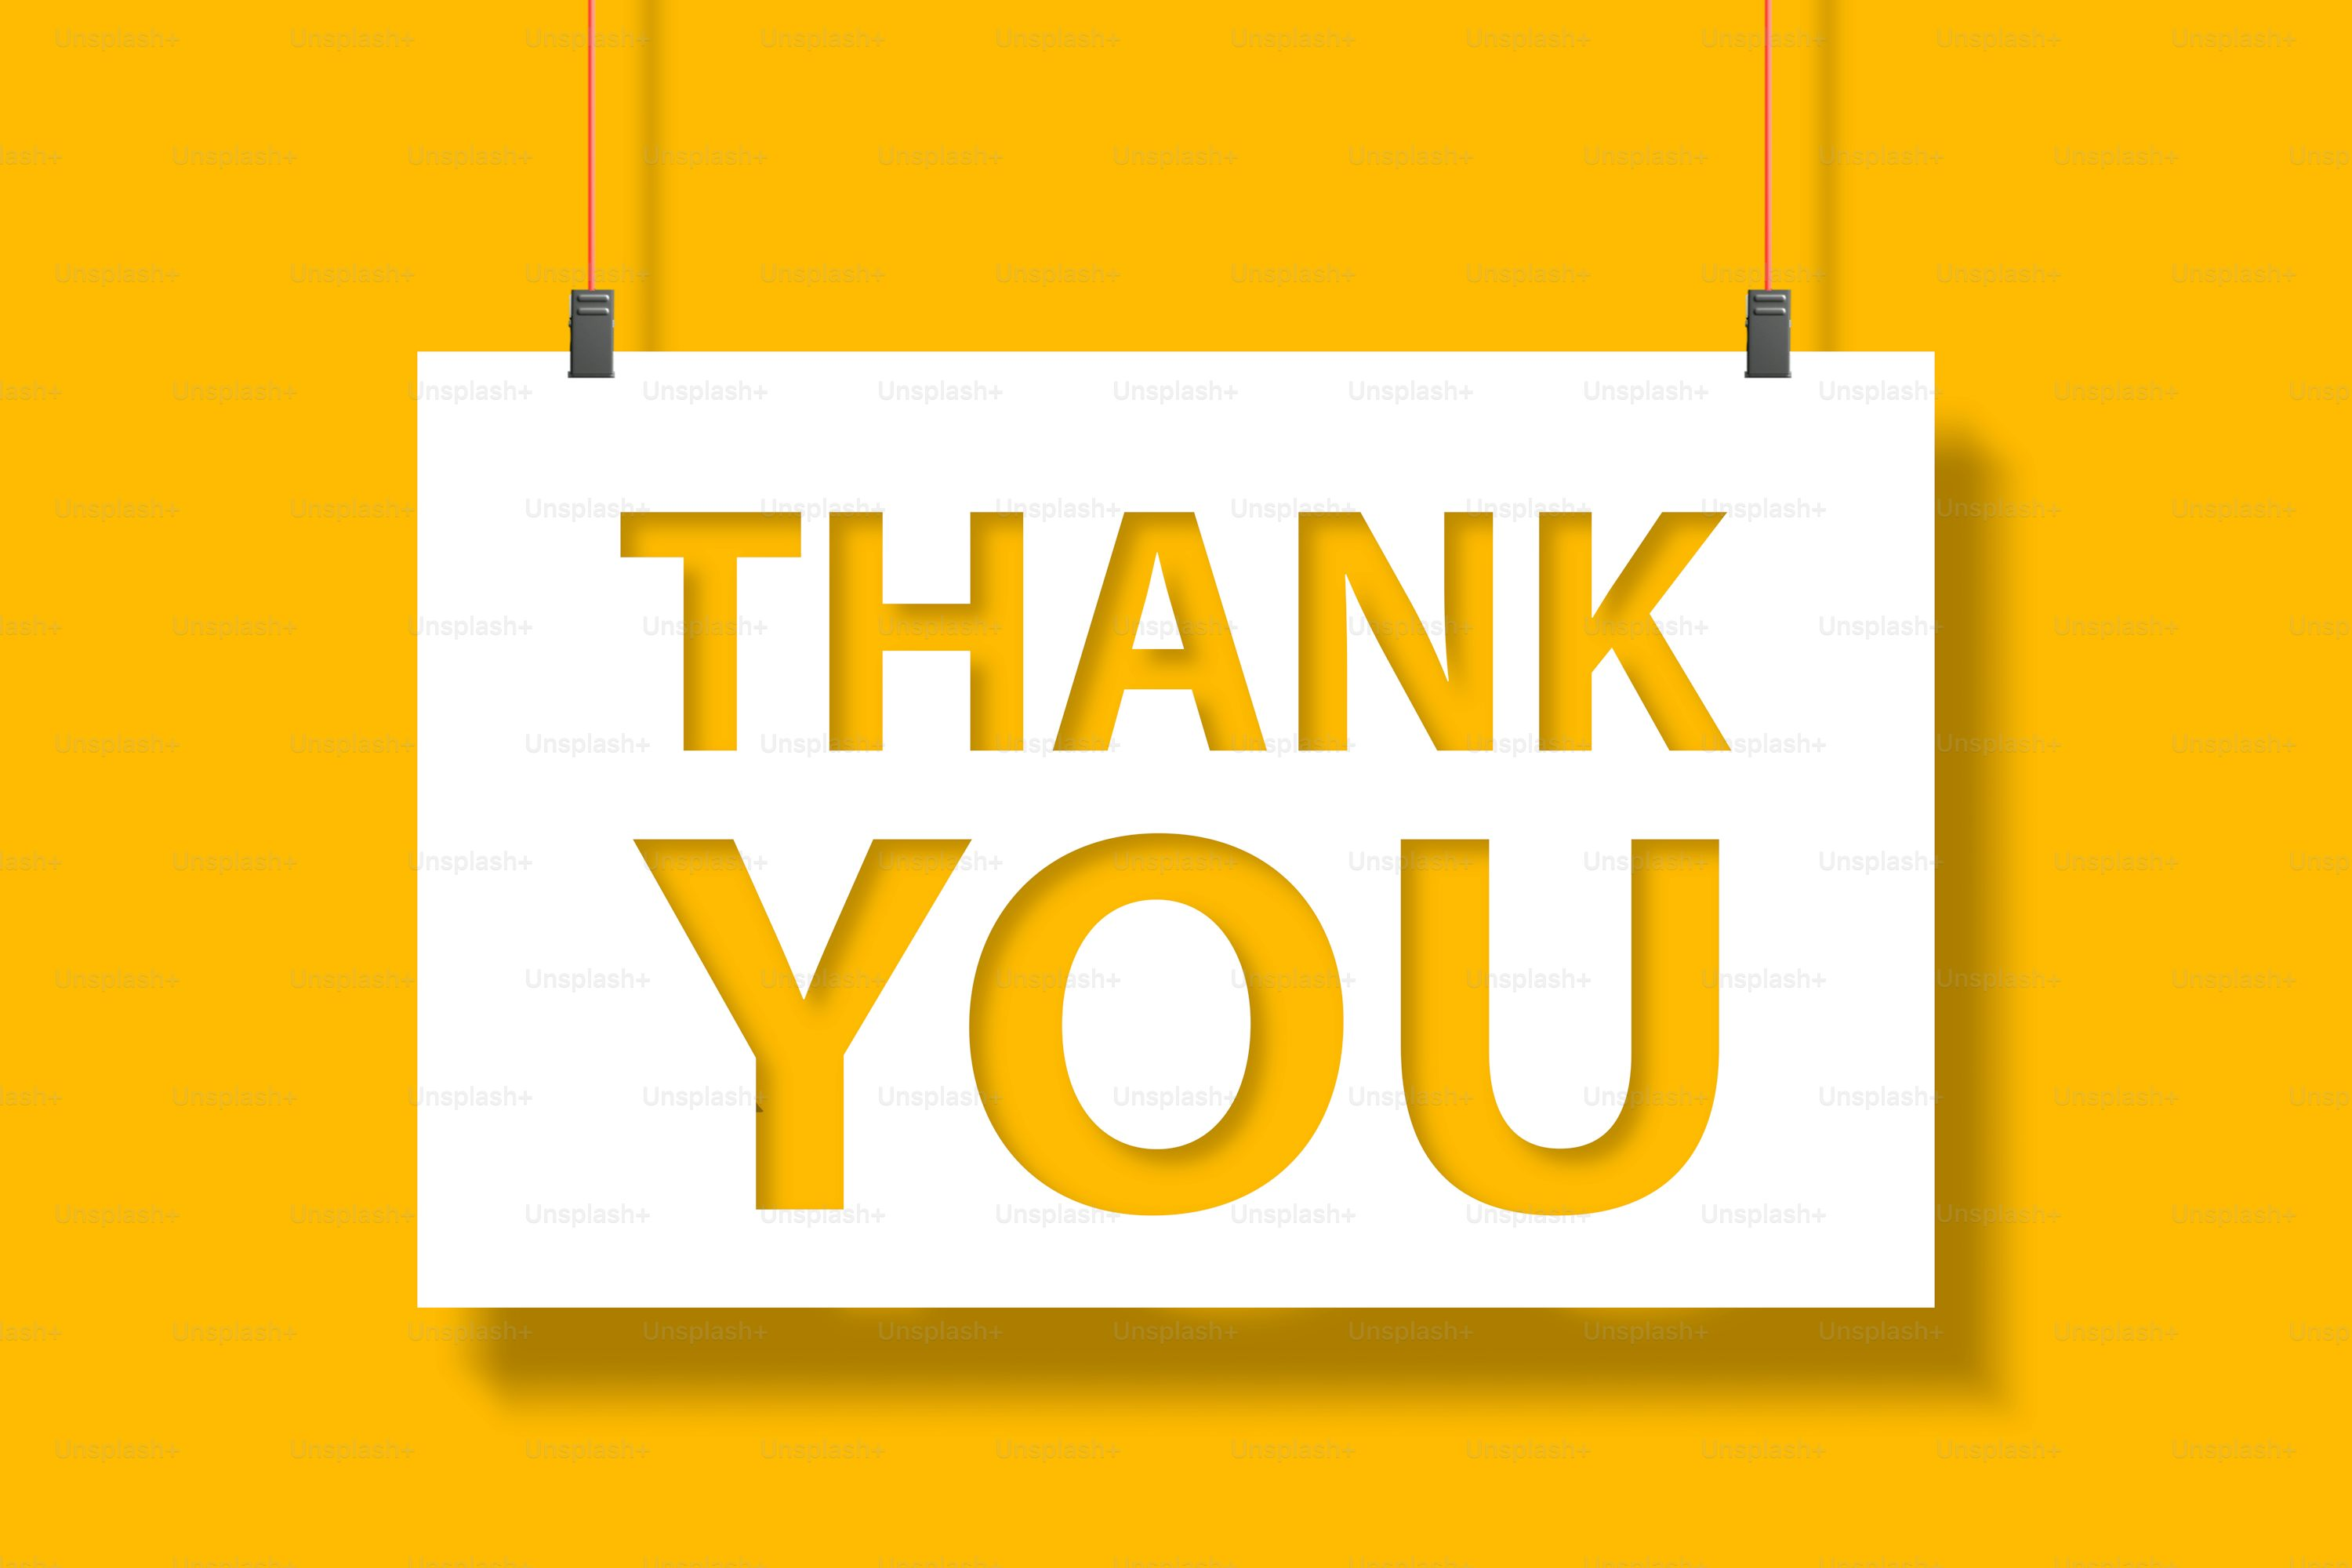